# Weather-Based Precipitation Prediction Using JFK Airport Data

This project analyzes a subset of historical weather data collected from JFK Airport, New York, provided by NOAA and curated for machine learning tasks.

The dataset contains approximately 5,727 hourly observations and 9 atmospheric variables such as temperature, humidity, wind speed, and station pressure.

The main purpose of the project is to build predictive models capable of estimating precipitation levels based on the observed meteorological features by using R notebook.

Through data exploration, preprocessing, model development, and evaluation, the project aims to identify the most effective approach for forecasting precipitation, which can support operational decisions like flight scheduling, runway preparation, and severe weather warnings.

The goal of this project is to:
- Predict precipitation levels at JFK Airport using hourly weather measurements.
- Practice and apply machine learning techniques including:
	•	Data cleaning and preprocessing
	•	Exploratory data analysis (EDA)
	•	Model building and selection
	•	Model evaluation and improvement
- Finally, identify the best predictive model based on performance metrics.

The original source is NOAA Local Climatological Data for JFK Airport.

Table of Contents:
  
1. Import Modules
2. Download and Unzip NOAA Weather Dataset
3. Read Dataset into Project
4. Select Subset of Columns
5. Clean Up Columns
6. Convert Columns to Numerical Types
7. Rename Columns
8. Exploratory Data Analysis
9. Linear Regression
10. Improve the Model
11. Find Best Model


## 1. Import Modules

In [96]:
# Load necessary package
library (tidymodels)
library (tidyverse)
library(dplyr)
library(readr)
library(yardstick)


## 2. Download and Unzip NOAA Weather Dataset

In [97]:
# define the URL and destination file path
url <- "https://dax-cdn.cdn.appdomain.cloud/dax-noaa-weather-data-jfk-airport/1.1.4/noaa-weather-sample-data.tar.gz"

# download the file
download.file(url, destfile = "noaa-weather-sample-data.tar.gz")

In [98]:
# Untar the zipped file.
untar ("noaa-weather-sample-data.tar.gz", tar = "internal")

Warning message in untar2(tarfile, files, list, exdir, restore_times):
“using pax extended headers”


## 3. Read Dataset into Project

In [99]:
# Load the CSV
jfk_weather <- read_csv("noaa-weather-sample-data/jfk_weather_sample.csv")

#display the first few rows of the dataframe
head(jfk_weather)

Rows: 5727 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): HOURLYPrecip
dbl  (7): HOURLYDewPointTempF, HOURLYRelativeHumidity, HOURLYDRYBULBTEMPF, H...
dttm (1): DATE

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


DATE,HOURLYDewPointTempF,HOURLYRelativeHumidity,HOURLYDRYBULBTEMPF,HOURLYWETBULBTEMPF,HOURLYPrecip,HOURLYWindSpeed,HOURLYSeaLevelPressure,HOURLYStationPressure
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
2015-07-25 13:51:00,60,46,83,68,0.00,13,30.01,29.99
2016-11-18 23:51:00,34,48,53,44,0.00,6,30.05,30.03
2013-01-06 08:51:00,33,89,36,35,0.00,13,30.14,30.12
2011-01-27 16:51:00,18,48,36,30,0.00,14,29.82,29.80
2015-01-03 12:16:00,27,61,39,34,T,11,NA,30.50
2013-02-15 20:51:00,35,79,41,38,0.00,6,29.94,29.92


In [100]:
glimpse(jfk_weather)

Rows: 5,727
Columns: 9
$ DATE                   <dttm> 2015-07-25 13:51:00, 2016-11-18 23:51:00, 2013…
$ HOURLYDewPointTempF    <dbl> 60, 34, 33, 18, 27, 35, 4, 14, 51, 71, 76, 19, …
$ HOURLYRelativeHumidity <dbl> 46, 48, 89, 48, 61, 79, 51, 65, 90, 94, 79, 37,…
$ HOURLYDRYBULBTEMPF     <dbl> 83, 53, 36, 36, 39, 41, 19, 24, 54, 73, 83, 44,…
$ HOURLYWETBULBTEMPF     <dbl> 68, 44, 35, 30, 34, 38, 15, 21, 52, 72, 78, 35,…
$ HOURLYPrecip           <chr> "0.00", "0.00", "0.00", "0.00", "T", "0.00", "0…
$ HOURLYWindSpeed        <dbl> 13, 6, 13, 14, 11, 6, 0, 11, 11, 5, 21, 7, 17, …
$ HOURLYSeaLevelPressure <dbl> 30.01, 30.05, 30.14, 29.82, NA, 29.94, 30.42, 3…
$ HOURLYStationPressure  <dbl> 29.99, 30.03, 30.12, 29.80, 30.50, 29.92, 30.40…


## 4. Select Subset of Columns

In [101]:
# Select subset of relevant columns
jfk_selected <- jfk_weather %>%
  select(HOURLYRelativeHumidity, HOURLYDRYBULBTEMPF, HOURLYPrecip,
         HOURLYWindSpeed, HOURLYStationPressure)


In [102]:
# Show the first 10 rows of this new dataframe
head(jfk_selected, 10)

HOURLYRelativeHumidity,HOURLYDRYBULBTEMPF,HOURLYPrecip,HOURLYWindSpeed,HOURLYStationPressure
<dbl>,<dbl>,<chr>,<dbl>,<dbl>
46,83,0.00,13,29.99
48,53,0.00,6,30.03
89,36,0.00,13,30.12
48,36,0.00,14,29.80
61,39,T,11,30.50
79,41,0.00,6,29.92
51,19,0.00,0,30.40
65,24,0.00,11,30.35
90,54,0.06,11,30.03


## 5. Clean Up Columns

In [103]:
# Inspect the unique values present in the column HOURLYPrecip 
unique (jfk_selected$HOURLYPrecip)

[1] "0.00"  "T"     "0.06"  NA      "0.03"  "0.02"  "0.08"  "0.01"  "0.07" 
[10] "0.16"  "0.09"  "0.22"  "0.02s" "0.24"  "0.18"  "0.05"  "0.04"  "0.09s"
[19] "0.11"  "0.14"  "0.25"  "0.10"  "0.01s" "0.58"  "0.12"  "0.13"  "0.46" 
[28] "1.07"  "1.19"  "0.34"  "0.20"  "0.36s" "0.42"  "0.17"  "0.27"  "0.35" 
[37] "0.31"  "0.33"  "0.23"  "0.26"  "0.28"  "0.75"  "0.19"  "0.36"  "0.03s"
[46] "0.07s" "0.54"  "0.59"  "0.21"

In [104]:
# clean the HOURLYPrecip column
jfk_cleaned_data <- jfk_selected %>%
   mutate (HOURLYPrecip = str_replace(HOURLYPrecip, "T", "0.0"),
   HOURLYPrecip = str_remove(HOURLYPrecip, "s$"))


In [105]:
unique(jfk_cleaned_data$HOURLYPrecip)

[1] "0.00" "0.0"  "0.06" NA     "0.03" "0.02" "0.08" "0.01" "0.07" "0.16"
[11] "0.09" "0.22" "0.24" "0.18" "0.05" "0.04" "0.11" "0.14" "0.25" "0.10"
[21] "0.58" "0.12" "0.13" "0.46" "1.07" "1.19" "0.34" "0.20" "0.36" "0.42"
[31] "0.17" "0.27" "0.35" "0.31" "0.33" "0.23" "0.26" "0.28" "0.75" "0.19"
[41] "0.54" "0.59" "0.21"

## 6. Convert Columns to Numerical Types

In [106]:
glimpse(jfk_cleaned_data)

Rows: 5,727
Columns: 5
$ HOURLYRelativeHumidity <dbl> 46, 48, 89, 48, 61, 79, 51, 65, 90, 94, 79, 37,…
$ HOURLYDRYBULBTEMPF     <dbl> 83, 53, 36, 36, 39, 41, 19, 24, 54, 73, 83, 44,…
$ HOURLYPrecip           <chr> "0.00", "0.00", "0.00", "0.00", "0.0", "0.00", …
$ HOURLYWindSpeed        <dbl> 13, 6, 13, 14, 11, 6, 0, 11, 11, 5, 21, 7, 17, …
$ HOURLYStationPressure  <dbl> 29.99, 30.03, 30.12, 29.80, 30.50, 29.92, 30.40…


In [107]:
jfk_data <- jfk_cleaned_data %>%
mutate (HOURLYPrecip = as.numeric (HOURLYPrecip))


In [108]:
glimpse(jfk_data)

Rows: 5,727
Columns: 5
$ HOURLYRelativeHumidity <dbl> 46, 48, 89, 48, 61, 79, 51, 65, 90, 94, 79, 37,…
$ HOURLYDRYBULBTEMPF     <dbl> 83, 53, 36, 36, 39, 41, 19, 24, 54, 73, 83, 44,…
$ HOURLYPrecip           <dbl> 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,…
$ HOURLYWindSpeed        <dbl> 13, 6, 13, 14, 11, 6, 0, 11, 11, 5, 21, 7, 17, …
$ HOURLYStationPressure  <dbl> 29.99, 30.03, 30.12, 29.80, 30.50, 29.92, 30.40…


## 7. Rename Columns

In [109]:
jfk_df <- jfk_data %>%
  rename(
    relative_humidity = HOURLYRelativeHumidity,
    dry_bulb_temp_f = HOURLYDRYBULBTEMPF,
    precip = HOURLYPrecip,
    wind_speed = HOURLYWindSpeed,
    station_pressure = HOURLYStationPressure
  )


In [110]:
head(jfk_df)

relative_humidity,dry_bulb_temp_f,precip,wind_speed,station_pressure
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
46,83,0,13,29.99
48,53,0,6,30.03
89,36,0,13,30.12
48,36,0,14,29.80
61,39,0,11,30.50
79,41,0,6,29.92


## 8. Exploratory Data Analysis

In [111]:
set.seed (1234)
jfk_split <- initial_split(jfk_df, prop = 0.8)
train_data2 <- training (jfk_split)
test_data2 <- testing(jfk_split)


Warning message:
“Removed 1817 rows containing non-finite outside the scale range (`stat_bin()`).”


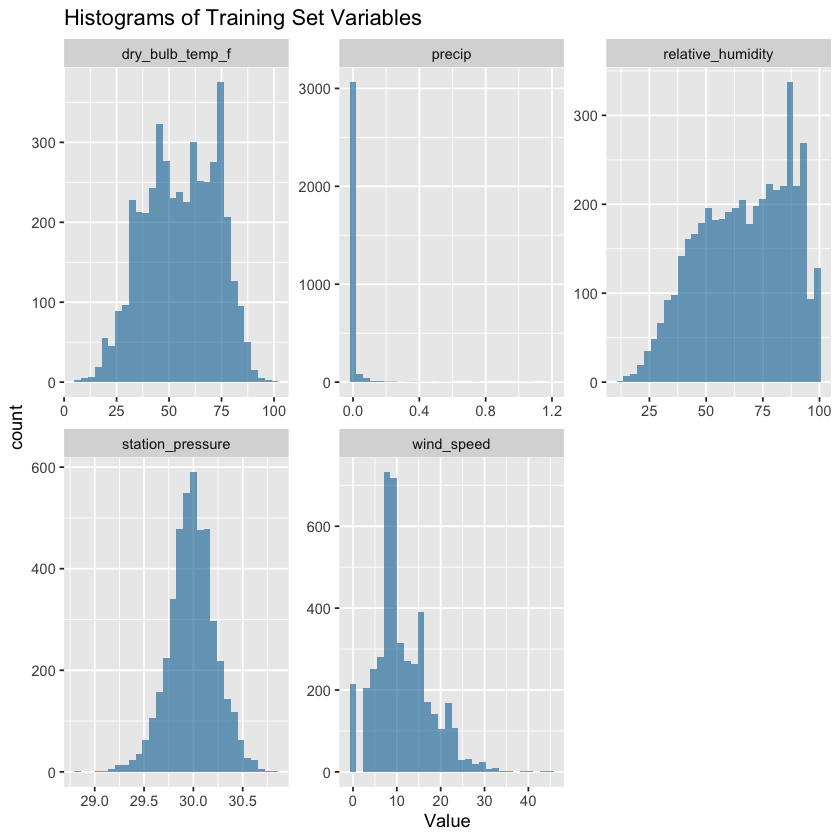

In [112]:
# Plot distribution of training set
train_data2 %>%
  pivot_longer(
    cols = c("relative_humidity", "dry_bulb_temp_f", "precip", "wind_speed", "station_pressure"),
    names_to = "Variable",
    values_to = "Value"
  ) %>%
  ggplot(aes(x = Value)) +
  geom_histogram(bins = 30, fill = "#006EA1", alpha = 0.6) +
  facet_wrap(~Variable, scales = "free") +
  labs(title = "Histograms of Training Set Variables")

## 9. Linear Regression

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1349 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 1349 rows containing missing values or values outside the scale range
(`geom_point()`).”


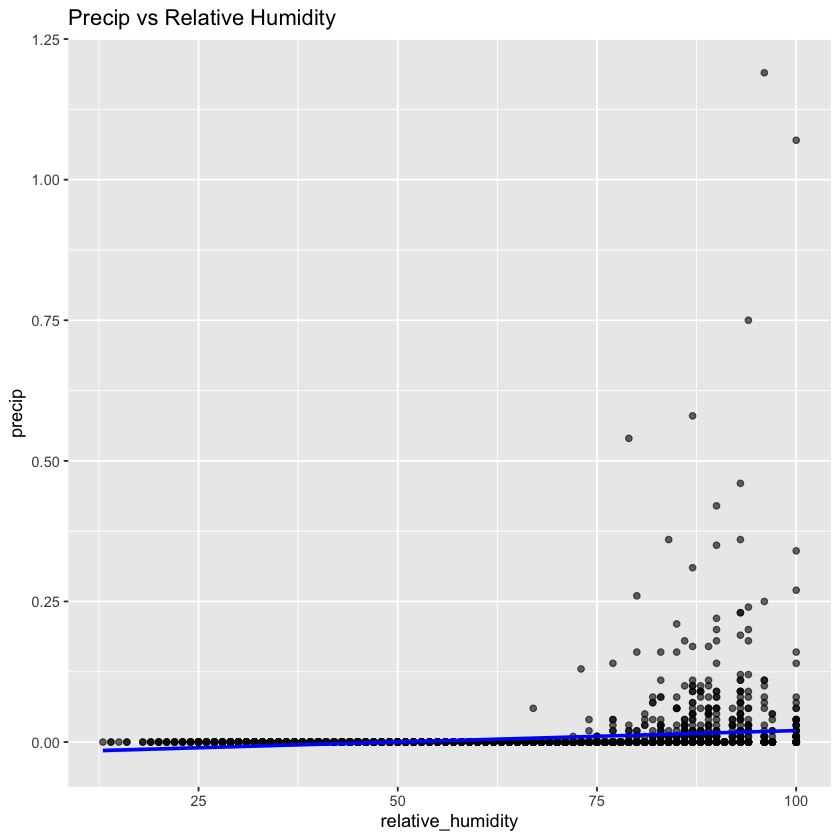

In [113]:
# Precip vs relative humidity
model1 <- lm(precip~ relative_humidity, data = train_data2)
ggplot(train_data2, aes (x=relative_humidity, y = precip)) +
   geom_point (alpha = 0.6) +
   geom_smooth (method = "lm", color ="blue") +
   labs (title = "Precip vs Relative Humidity")


This pattern aligns with meteorological intuition: precipitation generally requires high humidity, but high humidity alone doesn’t guarantee rain.
- At lower relative humidity (<70%), precipitation is nearly always zero.
- Above 75% humidity, there’s a visible increase in precipitation, but it’s still sparse and not uniformly distributed.
- A few outliers exist with relatively high precipitation values at 90–100% humidity.
- The blue line (probably a smooth fit) reflects a gentle upward curve, confirming a nonlinear relationship.

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1349 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 1349 rows containing missing values or values outside the scale range
(`geom_point()`).”


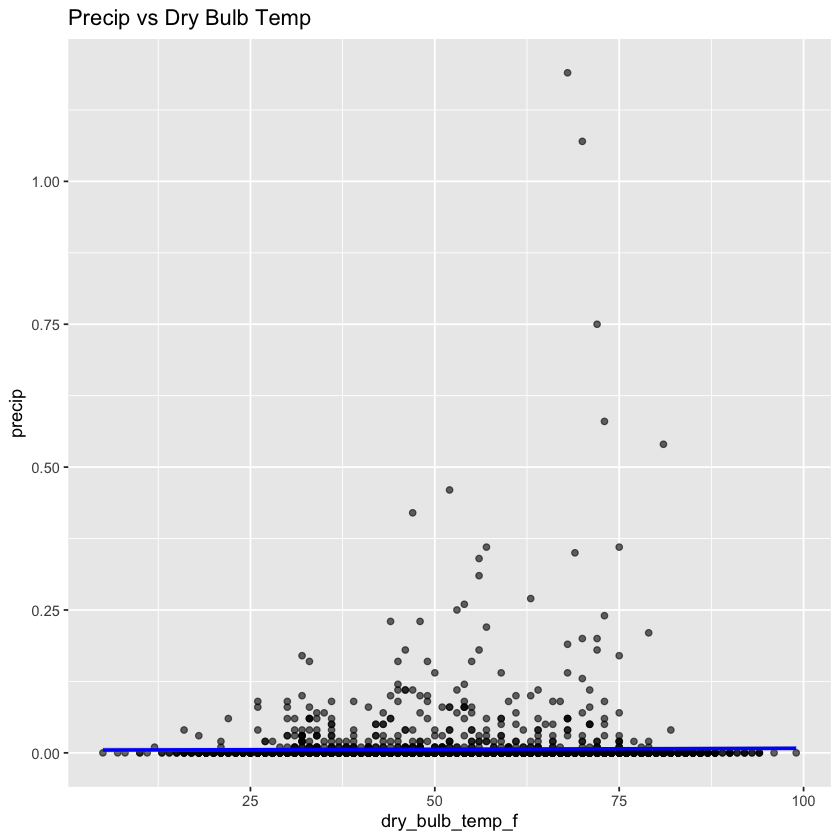

In [114]:
# Precip vs dry_dry_bulb_temp_f
model2 <- lm(precip ~ dry_bulb_temp_f, data = train_data2)
ggplot(train_data2, aes(x=dry_bulb_temp_f, y = precip)) +
   geom_point (alpha = 0.6) +
   geom_smooth (method = "lm", color="blue") +
   labs (title = "Precip vs Dry Bulb Temp")


- Dry bulb temperature doesn’t strongly drive or limit precipitation on its own. Most values for precipitation are clustered near zero, across the full range of temperatures. There’s no strong or obvious linear trend—precipitation appears at various temperatures, mostly between 30°F and 75°F.
- Compared to relative humidity, dry bulb temperature alone is a weak predictor of precipitation. There are scattered outliers where higher precipitation occurred, but not in a consistent temperature band.

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1349 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 1349 rows containing missing values or values outside the scale range
(`geom_point()`).”


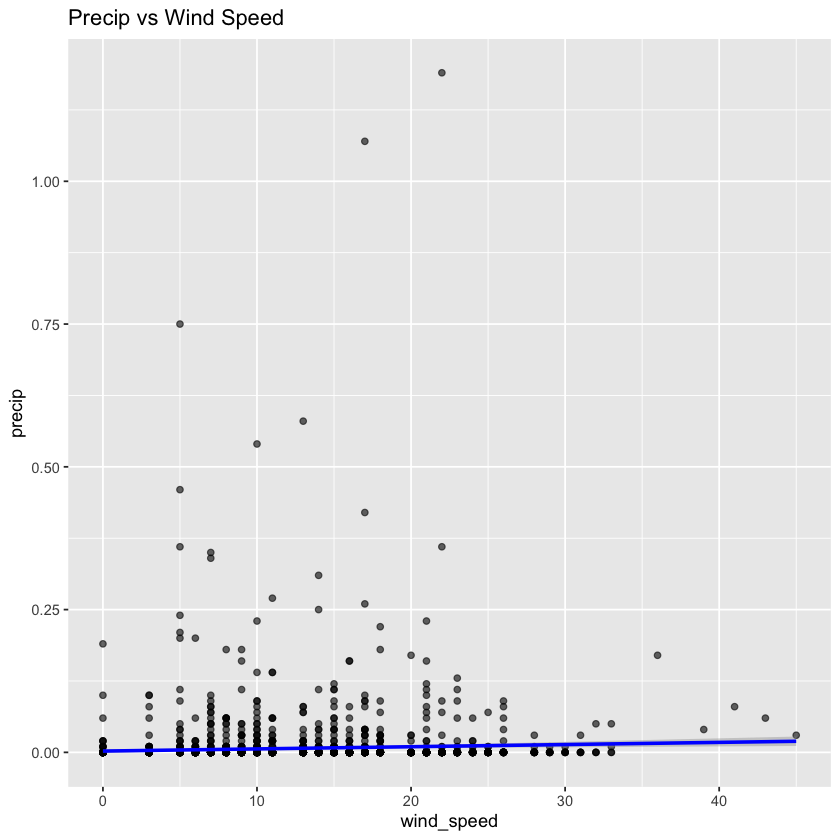

In [115]:
# Precip vs wind_speed
mode13 <- lm(precip ~ wind_speed, data = train_data2)
ggplot(train_data2, aes (x= wind_speed, y = precip)) +
   geom_point (alpha = 0.6) +
   geom_smooth (method = "lm", color="blue") +
   labs (title = "Precip vs Wind Speed" )


- Wind speed does not appear to be a strong standalone predictor of precipitation. Most precipitation values are near zero across all wind speeds.A few moderate precipitation events appear when wind speeds range from 5 to 25 mph.
- Higher wind speeds (>30 mph) do not show a clear link to increased precipitation.

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1353 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 1353 rows containing missing values or values outside the scale range
(`geom_point()`).”


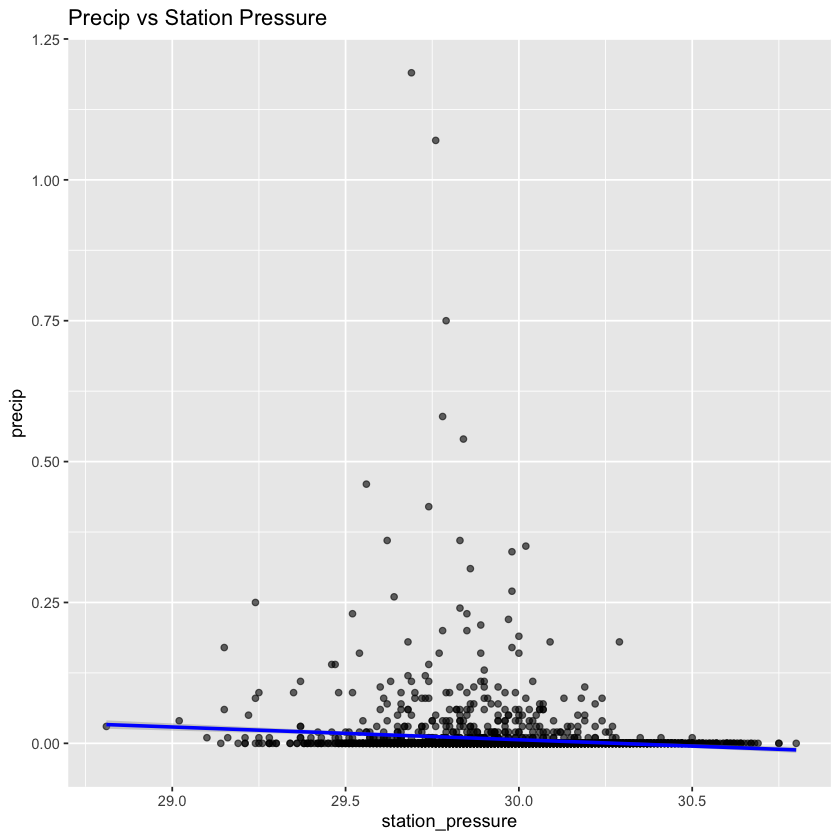

In [116]:
# Precip vs station_pressurestation _pressure
model4 <- lm(precip ~ station_pressure, data = train_data2)
ggplot(train_data2, aes (x= station_pressure, y = precip)) +
   geom_point (alpha = 0.6) +
   geom_smooth (method = "lm", color="blue") +
   labs (title = "Precip vs Station Pressure")


- Station pressure has a weak inverse relationship with precipitation: lower pressures are slightly more associated with rainfall.The majority of precipitation values are clustered near zero across the entire range of pressure values.
- A few higher precipitation spikes occur at lower to mid-range pressure values (~29.4 to 30.0 inHg).
- The blue trend line shows a slight downward slope, suggesting a negative correlation—though weak.

## 10. Improve the Model

Now, try improving the simple models you created in the previous section.
Create at least two more models, each model should use at least one of the different techniques:
1. Add more features/predictors
2. Add regularization (L1, L2 or a mix)
3. Add a polynomial component
Also, for each of the models you create, check the model performance using the training set and a metric like MSE, RMSE, or R-squared.
Consider using tidymodels if you choose to add regularization and tune lambda.


In [117]:
# drop missing values
train_data2_clean <- train_data2 %>%
drop_na(dry_bulb_temp_f, relative_humidity, wind_speed, station_pressure, precip)


In [118]:
# create a multilinear model
model_multilinear <- lm( precip ~ relative_humidity + dry_bulb_temp_f + wind_speed + station_pressure, data = train_data2_clean)

# create a polynomial model
model_polynomial <- lm(precip ~ poly(dry_bulb_temp_f, 2) + relative_humidity + wind_speed + station_pressure, data = train_data2_clean)

# create a ridge regression model
ridge_model <- linear_reg(penalty = 0.1, mixture = 0) %>%
   set_engine ("glmnet" )
ridge_fit <- ridge_model %>%
   fit(precip~ relative_humidity + dry_bulb_temp_f + wind_speed + station_pressure , data = train_data2_clean)



In [119]:
# create predictions on training data
multilinear_train <- predict(model_multilinear, newdata = train_data2_clean) %>%
  as_tibble() %>%
  rename(.pred = 1) %>%
  bind_cols(train_data2_clean)

pred_polynomial_train <- predict(model_polynomial, newdata = train_data2_clean) %>%
  as_tibble() %>%
  rename(.pred = 1) %>%
  bind_cols(train_data2_clean)

pred_ridge_train <- predict(ridge_fit, new_data = train_data2_clean) %>%
  as_tibble() %>%
  rename(.pred = 1) %>%
  bind_cols(train_data2_clean)


In [122]:
# Calculate metrics for Multilinear model
metrics_multilinear <- pred_multilinear_train %>%
  metrics(truth = precip, estimate = .pred) %>%
  bind_rows(
    rmse(pred_multilinear_train, truth = precip, estimate = .pred) %>%
      mutate(.metric = "mse")
  ) %>%
  mutate(model = "Multilinear")

# Calculate metrics for Polynomial model
metrics_polynomial <- pred_polynomial_train %>%
  metrics(truth = precip, estimate = .pred) %>%
  bind_rows(
    rmse(pred_polynomial_train, truth = precip, estimate = .pred) %>%
      mutate(.metric = "mse")
  ) %>%
  mutate(model = "Polynomial")

# Calculate metrics for Ridge model
metrics_ridge <- pred_ridge_train %>%
  metrics(truth = precip, estimate = .pred) %>%
  bind_rows(
    rmse(pred_ridge_train, truth = precip, estimate = .pred) %>%
      mutate(.metric = "mse")
  ) %>%
  mutate(model = "Ridge")

# Combine metrics into one table
all_metrics <- bind_rows(metrics_multilinear, metrics_polynomial, metrics_ridge)

# Create comparison table
comparison_table <- all_metrics %>%
  select(model, .metric, .estimate) %>%
  pivot_wider(names_from = .metric, values_from = .estimate)

# Display result
comparison_table

model,rmse,rsq,mae,mse
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Multilinear,0.04237299,0.04749902,0.01258635,0.04237299
Polynomial,0.04237295,0.04750080,0.01258616,0.04237295
Ridge,0.04286134,0.04544220,0.01111672,0.04286134


- All 3 models perform similarly, indicating that there’s likely limited nonlinear interaction among predictors, or that the relationship is not strongly predictable from these features.

- Polynomial Regression performs slightly better than Multilinear in R² and MAE, but the improvement is negligible.

- Ridge Regression has the lowest MAE (Mean Absolute Error), making it slightly better at minimizing large individual errors — although its RMSE and R² are marginally worse.
	

## 11. Find Best Model

In [123]:
# Set seed and split data
set.seed(1234)
split <- initial_split(train_data2, prop = 0.8)

# Clean training and testing data
train_data2_clean <- training(split) %>%
  drop_na(dry_bulb_temp_f, relative_humidity, wind_speed, station_pressure, precip)

test_data2_clean <- testing(split) %>%
  drop_na(dry_bulb_temp_f, relative_humidity, wind_speed, station_pressure, precip)

# Predict using the multilinear model
pred_multilinear_test <- predict(model_multilinear, newdata = test_data2_clean) %>%
  as_tibble() %>%
  rename(.pred = value) %>%
  bind_cols(test_data2_clean)

# Predict using the polynomial model
pred_polynomial_test <- predict(model_polynomial, newdata = test_data2_clean) %>%
  as_tibble() %>%
  rename(.pred = value) %>%
  bind_cols(test_data2_clean)

# Predict using the ridge regression model
pred_ridge_test <- predict(ridge_fit, new_data = test_data2_clean) %>%
  as_tibble() %>%
  rename(.pred = 1) %>%
  bind_cols(test_data2_clean)

In [124]:
# Calculate metrics for multilinear model
metrics_multilinear_train <- pred_multilinear_train %>%
  metrics(truth = precip, estimate = .pred)

# Calculate metrics for polynomial model
metrics_polynomial_train <- pred_polynomial_train %>%
  metrics(truth = precip, estimate = .pred)

# Calculate metrics for ridge regression model
metrics_ridge_train <- pred_ridge_train %>%
  metrics(truth = precip, estimate = .pred)

# View results
metrics_multilinear_train
metrics_polynomial_train
metrics_ridge_train

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.04237299
rsq,standard,0.04749902
mae,standard,0.01258635


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.04237295
rsq,standard,0.04750080
mae,standard,0.01258616


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.04286134
rsq,standard,0.04544220
mae,standard,0.01111672


After having trained and evaluated the 3 models to predict precipitation using weather data (humidity, temperature, wind speed, and pressure), we conclude from the outcome that all of them perform similarly in terms of error metrics.

While Ridge regression shows slightly better prediction accuracy (the lowest MAE), the low R² (0.045) across all models indicates that only 4.5% of the variation in precipitation is explained by these predictors which means that the predictors (humidity, temp, wind, pressure) do not strongly explain precipitation patterns alone.
